### Importing necessary liabraries

In [1]:
#importing the Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")

### Importing the data by using pandas liabrary

In [2]:
#Importing Data
salary_data=pd.read_csv('Salary_Data.csv')
salary_data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Initial analysis

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Assumption: Checking Linearty

Text(0.5, 1.0, 'Experience vs Salary')

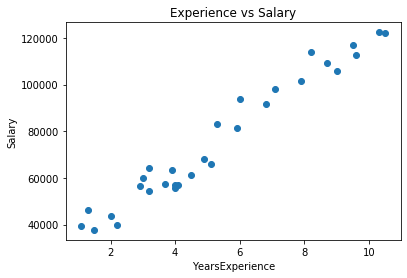

In [6]:
plt.scatter( x='YearsExperience',y='Salary',data=salary_data)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

In [7]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


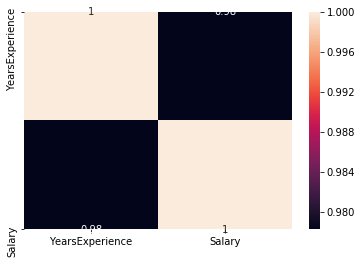

In [8]:
sns.heatmap(salary_data.corr(),annot=True)

## Model Building

###### Linear Regression with statsmodel

In [9]:
import statsmodels.formula.api as smf
#ordinary least square method that is OLS. For finding the best fit line
model=smf.ols("Salary~YearsExperience", data=salary_data).fit()

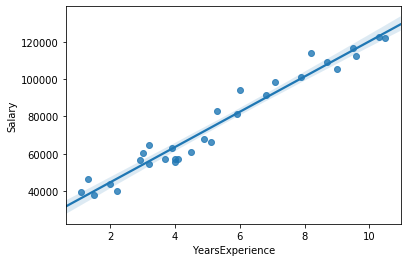

In [10]:
sns.regplot(x='YearsExperience', y='Salary', data=salary_data)

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
##Inference: We got the best fit line by regression plot 

#Multicollinearity: In this there is no multicollinearity

### Model Building

In [13]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=18)

### Model Training

In [15]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
linear_model.coef_

array([9442.75658682])

In [17]:
linear_model.intercept_

26116.96560759565

### Model Testing

In [18]:
y_pred_train=linear_model.predict(X_train)
y_pred_train

array([ 93160.53737399,  45002.47878123,  38392.54917046, 123377.3584518 ,
       116767.42884103,  56333.78668541,  63887.99195486, 103547.56961948,
        46891.03009859,  74275.02420036, 125265.90976916,  72386.47288299,
       115823.15318234, 111101.77488894, 100714.74264344,  56333.78668541,
        40281.10048782,  81829.22946981,  68609.37024827,  76163.57551772,
        53500.95970936, 108268.94791289,  82773.50512849,  62943.71629618])

In [19]:
y_pred_test=linear_model.predict(X_test)
y_pred_test

array([63887.99195486, 90327.71039794, 36503.99785309, 54445.23536804,
       61055.16497881, 64832.26761354])

In [20]:
y_test

array([56957., 91738., 39343., 60150., 57189., 57081.])

In [21]:
##For better understanding we need to plot the graph

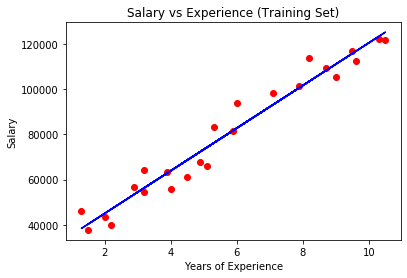

In [22]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train,linear_model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

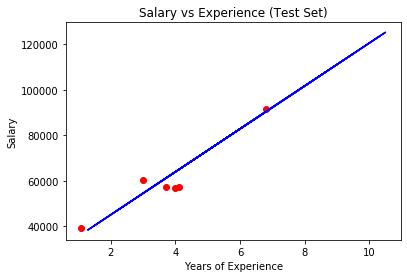

In [23]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, linear_model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

### Model Evaluation

## >>>>>>Training accuracy>>>>>>>>>>

In [25]:
print("Mean absolute error: ",mean_absolute_error(y_train,y_pred_train))
print("R2_score: ",r2_score(y_train,y_pred_train))

Mean absolute error:  4641.829730020324
R2_score:  0.9581398393395671


## >>>>>Testing accuracy>>>>>>>>>>

In [26]:
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred_test))
print("R2_score: ",r2_score(y_test,y_pred_test))

Mean absolute error:  4750.413488022355
R2_score:  0.8864330645841889


In [31]:
#Training and testing accuracy is best

In [27]:
prediction=pd.DataFrame({'y_Actual':y_test,'y_predicted': y_pred_test})
prediction

,y_Actual,y_predicted
0,56957.0,63887.991955
1,91738.0,90327.710398
2,39343.0,36503.997853
3,60150.0,54445.235368
4,57189.0,61055.164979
5,57081.0,64832.267614


### Model optimization

In [28]:
import statsmodels.formula.api as smf
#ordinary least square method that is OLS. For finding the best fit line
model=smf.ols("Salary~YearsExperience", data=salary_data).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.pvalues

#Null Hypothesis : There is no significance difference/importance for me.
#Alt Hypothesis : There is a significance difference. You are important.

#p<0.05, reject Null Hypothesis

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

## Optimized Model's Evaluation

In [30]:
model.aic,model.rsquared

(606.882316930432, 0.9569566641435086)

In [32]:
#After seeing aic and rsquared values, we can say our model is best model

### >>>>>>>>>>>>>>>>>>>>>The End!!!>>>>>>>>>>>>>>>>>>>